In [1]:
%run setup.ipynb

### Chapter 1

A few simple waves

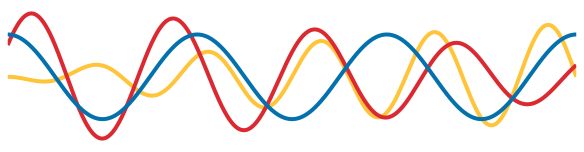

In [2]:
fig, ax = plt.subplots(figsize=figaspect(0.25))

t = np.linspace(0, 1, num=1000)

x1 = np.cos(2 * np.pi * 3 * t)
x2 = np.cos(2 * np.pi * 4 * t - np.pi/3) * np.exp(-t**2) * 1.5
x3 = np.cos(2 * np.pi * 5 * t + np.pi/2) * (1 - np.exp(-t)) * 2

ax.plot(t, x1, linewidth=4, zorder=3)
ax.plot(t, x2, linewidth=4, zorder=2)
ax.plot(t, x3, linewidth=4, zorder=1)
ax.set(xticks=[], yticks=[]);
fig.savefig('images/chapter01.svg')

### Chapter 2
A continuous signal, fading into a discrete signal

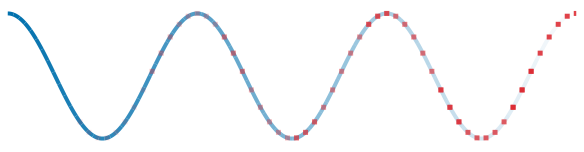

In [3]:
fig, ax = plt.subplots(figsize=figaspect(0.25))

t0 = np.linspace(0, 1, num=1000)

x1 = np.cos(2 * np.pi * 3 * t0)

t2 = np.linspace(0, 1, num=64)
x2 = np.cos(2 * np.pi * 3 * t2)

step = len(t0) // 100

for t in range(0, len(t0), step):
    ax.plot(t0[t:t+step+1], x1[t:t+step+1], linewidth=4, zorder=2, alpha=(len(t0) - t)/len(t0), color=colors[0], solid_capstyle='butt')
    
step2 = len(t2) // 8
for t in range(0, len(t2), step2):
    ax.step(t2[t:t+step+1], x2[t:t+step+1], linewidth=0, zorder=3, where='post', marker='s', color=colors[1], alpha=1-(len(t2) - t)/len(t2))
    
ax.set(xticks=[], yticks=[]);
fig.savefig('images/chapter02.svg')

### Chapter 3
convolution

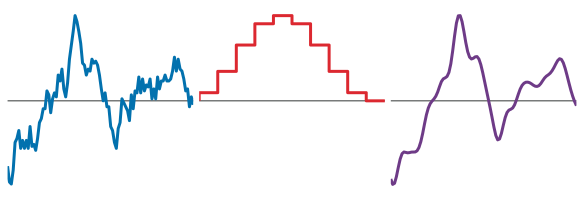

In [200]:
import soundfile as sf
x, fs = sf.read('ch09-stft/24604__acclivity__altosaxfastscales.wav')

fig, ax = plt.subplots(figsize=figaspect(1./3), ncols=3, sharey=True)

w = scipy.signal.get_window('hann', 11, fftbins=False)

ax[0].plot(x[1000:1100] / x[1000:1100].max())
ax[0].axhline(0, color=colors[3], linewidth=1, zorder=-1)
ax[1].step(np.arange(len(w)), w, color=colors[1])
ax[1].axhline(0, color=colors[3], linewidth=1, zorder=-1)

wx = scipy.signal.convolve(x, w, mode='same')
ax[2].plot(wx[1000:1100] / wx[1000:1100].max(), color=colors[4])
ax[2].axhline(0, color=colors[3], linewidth=1, zorder=-1)

ax[0].set(xticks=[], yticks=[])
ax[1].set(xticks=[], yticks=[])
ax[2].set(xticks=[], yticks=[]);


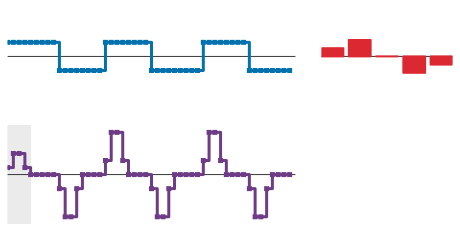

In [219]:
from matplotlib import gridspec

# Make an array of samples with a square wave
fs = 50

# Time sample positions
t = np.linspace(0, 1, num=fs, endpoint=False)
x = scipy.signal.square(2 * np.pi * 3 * t)

# filter coefficients
h = np.array([0.5, 1, 0, -1, -1/2])
K = len(h)

y = np.convolve(x, h)[:len(x)]
    
# Set up the plot skeleton
fig = plt.figure(figsize=figaspect(.5))

gs = gridspec.GridSpec(2, 3)

ax = plt.subplot(gs[0:1, 0:2])
# This is the input data
p_x_orig = ax.step(t, x,  marker='s', where='post',
                       color=colors[0], zorder=2)
ax.axhline(0, color=colors[3], linewidth=1, zorder=-1)

# And a label that will change
ax.label_outer()


ax2 = plt.subplot(gs[1:2, 0:2], sharex=ax, sharey=ax)

p_y = ax2.step(t, y, marker='s', where='post',
                  color=colors[4])[0]
ax2.axvspan(0, (K-1) / fs, alpha=0.1, zorder=-1, color=colors[3])
ax2.label_outer()
ax2.axhline(0, color=colors[3], linewidth=1, zorder=-1)
ax2.set_ylim([-3.5, 3.5])
ax2.set_xlim([0, 1]);
ax2.set(xticks=[], yticks=[])

ax3 = plt.subplot(gs[0:1, 2])
p_h = ax3.bar(np.arange(K), h, color=colors[1], 
                linewidth=2, edgecolor=colors[1])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.axhline(0, color=colors[3], linewidth=1, zorder=-1)
ax3.set_ylim([-3, 3])
ax3.get_xaxis().set_ticks_position('top')
ax3.get_yaxis().set_ticklabels([]);
fig.savefig('images/chapter03.svg')

### Chapter 4
Complex plane, spiral

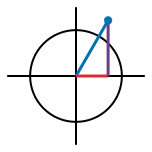

In [78]:
fig, ax = plt.subplots(figsize=figaspect(0.25))

ax.axvline(0, color='k', zorder=-5, linewidth=2)
ax.axhline(0, color='k', zorder=-5, linewidth=2)
circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=2, fill=False, zorder=-5)
ax.add_artist(circ)

#theta = np.linspace(0, 2 * np.pi, num=1000)
#r = np.linspace(0.25, 1.25, num=len(theta))
#ax.plot(r * np.cos(theta), r * np.sin(theta))

theta = np.pi * 1 / 3
r = 1.4

ax.plot([0, r * np.cos(theta)], [0, r * np.sin(theta)])
ax.scatter([r * np.cos(theta)], [r * np.sin(theta)], marker='o', s=60, zorder=10)
ax.plot([0, r * np.cos(theta)], [0, 0], color=colors[1])
ax.plot([r * np.cos(theta), r * np.cos(theta)], [0, r * np.sin(theta)], color=colors[4])
ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], aspect='equal', xticks=[], yticks=[]);
fig.savefig('images/chapter04.svg')

### Chapter 5

dft

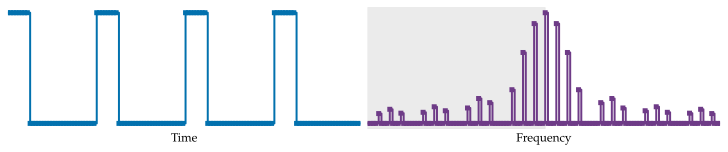

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=figaspect(0.2))

t = np.linspace(0, 1, num=128, endpoint=False)
x = scipy.signal.square(2 * np.pi * 4 * t, duty=1./4)

xf = np.fft.fft(x)
f = np.fft.fftfreq(len(t), 1/len(t))

ax[0].step(t, x, where='post', marker='s', linewidth=2)
ax[1].step(f[np.argsort(f)], np.abs(xf[np.argsort(f)]), where='post', linewidth=2, marker='s', color=colors[4])
ax[1].axvspan(f.min(), 0, color=colors[3], alpha=0.1, zorder=-1)
ax[0].set(xticks=[], yticks=[], xlabel='Time')
ax[1].set(xticks=[], yticks=[], xlabel='Frequency');
fig.savefig('images/chapter05.svg')

### Chapter 6
properties of dft

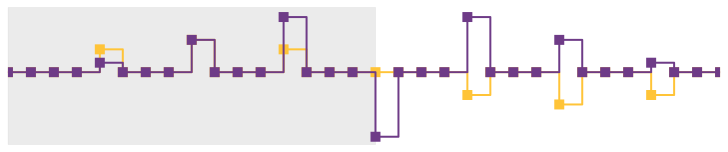

In [197]:
fig, ax = plt.subplots(figsize=figaspect(0.2))

t = np.linspace(0, 1, num=32, endpoint=False)
x = scipy.signal.square(2 * np.pi * 4 * t, duty=1./4)

xf = np.fft.fft(x)
f = np.fft.fftfreq(len(t), 1/len(t))

ax.step(f[np.argsort(f)], xf[np.argsort(f)].imag, where='post', linewidth=2, marker='s', markersize=10, color=colors[2])
ax.step(f[np.argsort(f)], xf[np.argsort(f)].real, where='post', linewidth=2, marker='s', markersize=10, color=colors[4])

ax.axvspan(f.min(), 0, color=colors[3], alpha=0.1, zorder=-1)
ax.set(xticks=[], yticks=[], ylim=[-np.max(np.abs(xf))-2, np.max(np.abs(xf))+0.1]);
fig.savefig('images/chapter06.svg')

### Chapter 7
reverse prism

### Chapter 8
FFT

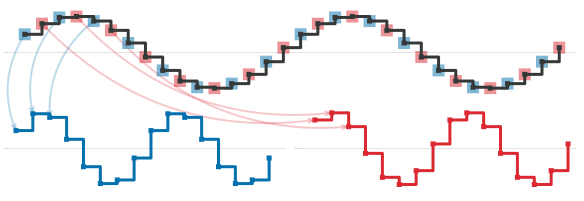

In [94]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import ConnectionPatch

fig = plt.figure(figsize=figaspect(0.335))

N = 32

m = 2
n = np.arange(N)
x = np.cos(2 * np.pi * m * n / N - np.pi / 3)

gs = fig.add_gridspec(2, 4)

ax0 = fig.add_subplot(gs[0, :])
ax0.set(xlim=[-1, N], ylim=[-1.25, 1.25], xticks=[], yticks=[0], yticklabels=[])
ax0.step(n, x, color=colors[3], where='post', marker='s')
ax0.plot(n[::2], x[::2], color=colors[0], marker='s', markersize=12, zorder=-10, linestyle='', alpha=0.5)
ax0.plot(n[1::2], x[1::2], color=colors[1], marker='s', markersize=12, zorder=-10, linestyle='', alpha=0.5)
ax0.label_outer()

# Second row
ax1 = fig.add_subplot(gs[1, :2], sharex=ax0, sharey=ax0)
ax1.step(n[::2], x[::2], color=colors[0], where='post', marker='s')
ax1.label_outer()

# Connect up the first three samples
for i in range(0, 6, 2):
    p = ConnectionPatch((n[i], x[i]), (n[i], x[i]), 'data', connectionstyle="arc3,rad=-0.25", arrowstyle="<-",
                        axesA=ax1, axesB=ax0, color=colors[0], alpha=0.25, zorder=-1, linewidth=2)
    fig.add_artist(p)

ax2 = fig.add_subplot(gs[1, 2:], sharex=ax0, sharey=ax0)
ax2.step(n[1::2], x[1::2], color=colors[1], where='post', marker='s')
ax2.label_outer()
for i in range(1, 7, 2):
    p = ConnectionPatch((n[i], x[i]), (n[i], x[i]), 'data', connectionstyle="arc3,rad=-0.25", arrowstyle="<-",
                        axesA=ax2, axesB=ax0, color=colors[1], alpha=0.25, zorder=-1, linewidth=2)
    fig.add_artist(p)

fig.savefig('images/chapter08.svg')

### Chapter 9
spectrogram

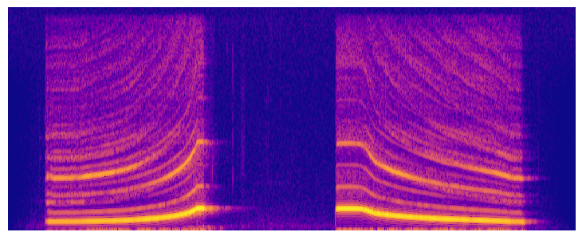

In [22]:
import soundfile as sf

x, fs = sf.read('ch09-stft/517633__samuelgremaud__slide-whistle-1-mono.wav')

f, t, S = scipy.signal.spectrogram(x, fs, window='hann', nfft=2048)

fig, ax = plt.subplots(figsize=figaspect(0.4))

ax.pcolormesh(t, f, 10 * np.log(S + 1e-12), shading='auto', edgecolors="None", rasterized=True)
ax.set(xticks=[], yticks=[]);
fig.savefig('images/chapter09.svg');

### Chapter 10
FIR filter, sinc

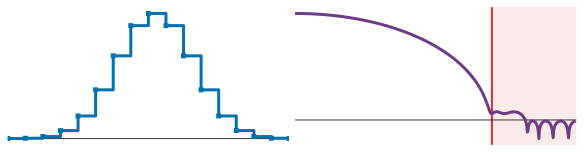

In [84]:
fig, ax = plt.subplots(figsize=figaspect(0.25), ncols=2)

b = scipy.signal.remez(17, [0.35, 0.4, 0.41, 0.5], [1, 0])
w, h = scipy.signal.freqz(b)

ax[0].step(np.arange(len(b)), b, where='post', marker='s')
ax[0].axhline(0, color=colors[3], zorder=-1, linewidth=1)

ax[1].plot(w, 20 * np.log(np.abs(h) + 1e-10), color=colors[4])
ax[1].axvline(0.35 * 2 * np.pi, color=colors[1], zorder=-1, linewidth=2)
ax[1].axhline(-30, color=colors[3], zorder=-1, linewidth=1)
ax[1].axvspan(0.35 * 2 * np.pi, np.pi, color=colors[1], alpha=0.1, zorder=-1)

ax[0].set(xticks=[], yticks=[]);
ax[1].set(xticks=[], yticks=[]);

fig.savefig('images/chapter10.svg')

### Chapter 11
IIR filter

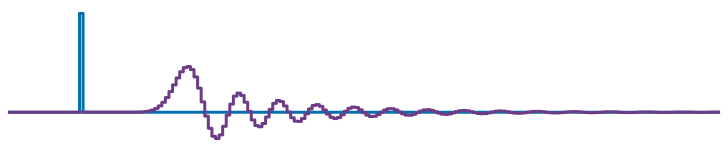

In [30]:
fig, ax = plt.subplots(figsize=figaspect(0.2))

# make a 5-tap butterworth filter
order, wn = scipy.signal.buttord(0.2, 0.27, 6, 80)
b, a = scipy.signal.butter(order, wn, output='ba')

t = np.linspace(0, 1, num=200)
x = np.zeros(len(x))
x[20] = 1

y = scipy.signal.lfilter(b, a, x)

ax.step(t, x, where='post')
ax.step(t, y * 3, where='post', color=colors[4])
ax.set(xticks=[], yticks=[])
fig.savefig('images/chapter11.svg')

### Chapter 12
z-Transform, PZ plot

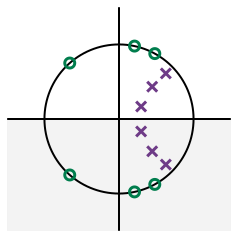

In [41]:
fig, ax = plt.subplots(figsize=figaspect(0.4))

ax.axvline(0, color='k', zorder=-5, linewidth=2)
ax.axhline(0, color='k', zorder=-5, linewidth=2)
circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=2, fill=False, zorder=-5)
ax.add_artist(circ)

# make a 5-tap butterworth filter
#order, wn = scipy.signal.buttord(0.25, 0.5, 1, 40)
#z, p, k = scipy.signal.butter(order, wn, output='zpk')

order, wn = scipy.signal.cheb2ord(0.25, 0.35, 4, 40)
z, p, k = scipy.signal.cheby2(order, 40, wn, output='zpk')

ax.scatter(z.real, z.imag, marker='o', color=colors[5], s=100, facecolor='none', linewidth=3)
ax.scatter(p.real, p.imag, marker='x', color=colors[4], s=100)
ax.axhspan(-1.5, 0, alpha=0.05, color='k', zorder=-1)
ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], aspect='equal', xticks=[], yticks=[]);
fig.savefig('images/chapter12.svg')

# Appendix A
venn diagram, modular arithmetic, logarithms

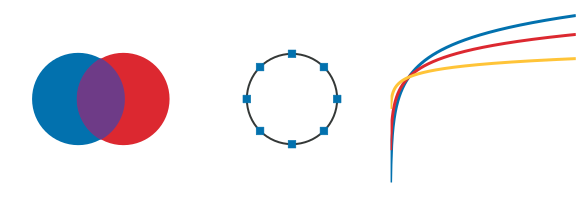

In [170]:
fig, ax = plt.subplots(ncols=3, figsize=figaspect(1./3))

c1 = patches.Ellipse((-0.5, 0), 2, 2, color=colors[0], linewidth=2, fill=True, zorder=-5)
ax[0].add_artist(c1)
c2 = patches.Ellipse((0.5, 0), 2, 2, color=colors[1], linewidth=2, fill=True, zorder=-5)
ax[0].add_artist(c2)

x = np.linspace(-0.5, 0.5, num=257, endpoint=True)
t0 = np.arccos(x - -0.5)
t1 = np.arccos(x - 0.5)
y = np.minimum(np.sin(t0), np.sin(t1))
ax[0].fill_between(x, y, -y, color=colors[4], edgecolor=colors[4], linewidth=3)

ax[0].set(xlim=[-2.05, 2.05], ylim=[-2, 2], aspect='equal', xticks=[], yticks=[]);


c3 = patches.Ellipse((-0, 0), 2, 2, color=colors[3], linewidth=2, fill=False, zorder=-5)
ax[1].add_artist(c3)
theta = np.linspace(0, 2 * np.pi, num=8, endpoint=False)
ax[1].scatter(np.cos(theta), np.sin(theta), color=colors[0], marker='s', s=60)
ax[1].set(xticks=[], yticks=[], xlim=[-2.05, 2.05], aspect='equal');

x = np.linspace(0, 10, num=512)
ax[2].plot(x, np.log2(x))
ax[2].plot(x, np.log(x))
ax[2].plot(x, np.log10(x))
ax[2].set(xticks=[], yticks=[], aspect='equal');
fig.savefig('images/appendixA.svg');